# Week 4: Fourier transform: filtering and sampling

The exercise of this week is about Fourier Transform, image filtering and sampling. First load the following libraries that will be necessary.

In [1]:
!pip install scipy
!pip install scikit-image

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


In [11]:
%matplotlib inline

from time import time
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.signal import unit_impulse
from scipy.ndimage import convolve
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.pyplot import imshow, show, figure
import numpy as np

Load the two images wall.jpg and sidewalk.jpg.

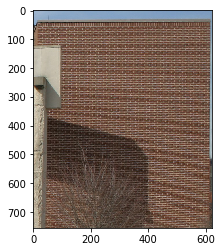

In [3]:
wall = np.array(imread('wall.jpg'), dtype=np.float) / 255.
wall_gray = rgb2gray(wall)
imshow(wall)

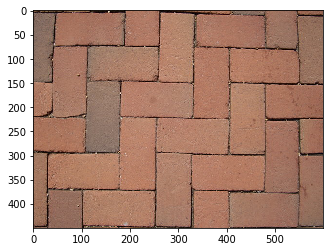

In [4]:
side = np.array(imread('sidewalk.jpg'), dtype=np.float) / 255.
side_gray = rgb2gray(side)
imshow(side)

Preliminary question: which of the two images as the most low pass content? Which one has the most high pass content?

Answer: the second one has the most "low pass content" (not that many edges, more flat regions), the first one has many frequency changes = edges

The following functions will be useful in the course of this tutorial: *fft2*, *ifft2* from scipy and the following function:

In [5]:
def gaussian_filter(shape, sigma):
    """
    Returns a 2D gaussian filter specified by its shape and standard deviation.
    """
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

## Part A: Filtering

Create three Gaussian filters:
- one 5x5 Gaussian low pass filter with standard deviation 1
- one 15x15 Gaussian high pass filter with standard deviation 3.5. Hint: the high pass content of an image can be extracted by subtracting the low pass filtered image from the original image. Hence, you can get a high pass filter kernel from a low pass one by subtracting the low pass filter kernel from a unit impulse filter.
- one band pass filter. To do this, create first a 15x15 Gaussian filter with standard deviation 1 and then convolve this low pass filter with the previous high pass filter to create the band pass filter.

Low pass filter
In spatial domain:


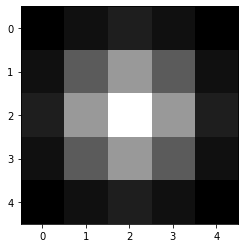

In frequency domain:


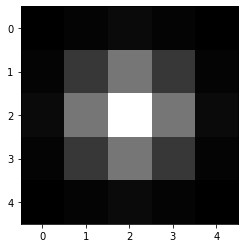

High pass filter 
In spatial domain:


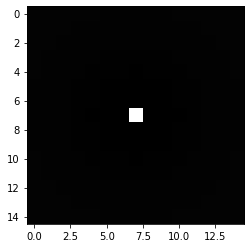

In frequency domain:


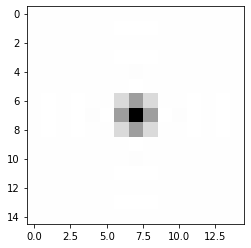

Band pass filter
In spatial domain:


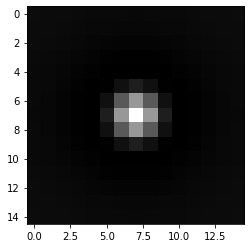

In frequency domain:


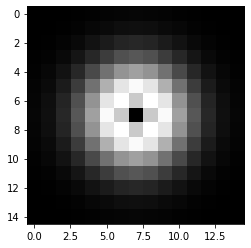

In [18]:
# Low pass filter
# Enter your code here
lp_filter = gaussian_filter((5, 5), 1)
print("Low pass filter\nIn spatial domain:")
imshow(lp_filter, cmap='gray')
show()
print("In frequency domain:")
imshow(np.abs(fftshift(fft2(lp_filter))), cmap='gray')
show()

# High pass filter
# Enter your code here
hp_filter = unit_impulse((15, 15), idx='mid') - gaussian_filter((15, 15), 3.5)
print("High pass filter \nIn spatial domain:")
imshow(hp_filter, cmap='gray')
show()
print("In frequency domain:")
imshow(np.abs(fftshift(fft2(hp_filter))), cmap='gray')
show()

# Band pass filter
# Enter your code here
bp_filter = convolve(gaussian_filter((15, 15), 1), hp_filter)
print("Band pass filter\nIn spatial domain:")
imshow(bp_filter, cmap='gray')
show()
print("In frequency domain:")
imshow(np.abs(fftshift(fft2(bp_filter))), cmap='gray')
show()

Apply these three filters to the two sample grayscale images in spatial domain first by convolving the image with the kernel, and in frequency domain secondly by taking the Fourier tranform of both the image and the filter kernel and multiplying them. Compare the runtimes of spatial and frequency domain filtering, using the *time* function of python. Compare the filtering results of two images by visualizing the filtered images in both spatial and frequency domains. Check that your initial guess about the low/high pass content of the images is correct.

### Filtering in spatial domain

Original image:


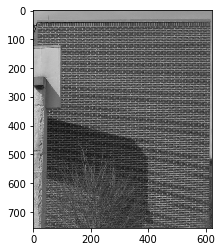

Low pass filtered in -0.013836145401000977


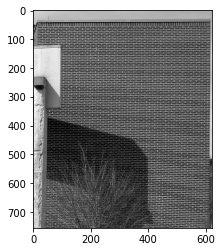

High pass filtered in -0.13065004348754883


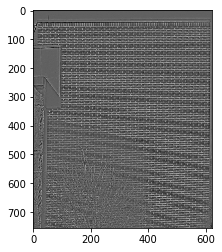

Band pass filtered in -0.136796236038208


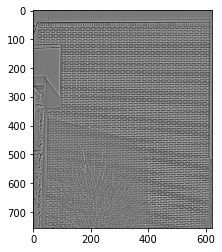

In [19]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

start = time()
wall_lp = convolve(wall_gray, lp_filter)
end = time()
print("Low pass filtered in {}".format(end - start))
imshow(wall_lp, cmap='gray')
show()

start = time()
wall_hp = convolve(wall_gray, hp_filter)
end = time()
print("High pass filtered in {}".format(end - start))
imshow(wall_hp, cmap='gray')
show()

start = time()
wall_bp = convolve(wall_gray, bp_filter)
end = time()
print("Band pass filtered in {}".format(end - start))
imshow(wall_bp, cmap='gray')
show()

Original image:


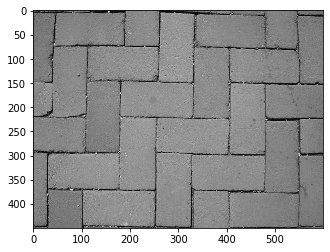

Low pass filtered in 0.009267091751098633


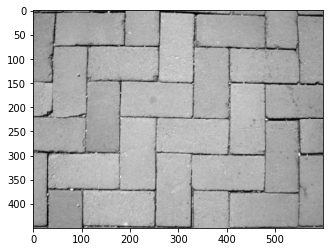

High pass filtered in 0.07392382621765137


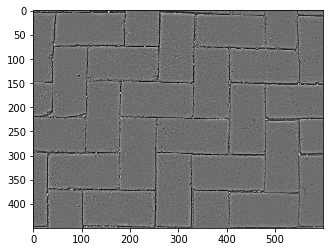

Band pass filtered in 0.07991814613342285


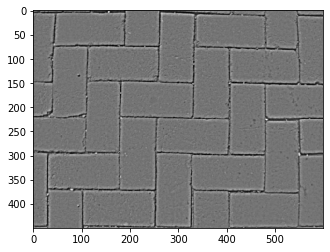

In [21]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

start = time()
side_lp = convolve(side_gray, lp_filter)
end = time()
print("Low pass filtered in {}".format(end - start))
imshow(side_lp, cmap='gray')
show()

start = time()
side_hp = convolve(side_gray, hp_filter)
end = time()
print("High pass filtered in {}".format(end - start))
imshow(side_hp, cmap='gray')
show()

start = time()
side_bp = convolve(side_gray, bp_filter)
end = time()
print("Band pass filtered in {}".format(end - start))
imshow(side_bp, cmap='gray')
show()

### Filtering in frequency domain

Note: the output of *ifft2* is a numpy array with complex values. You can use the command *.astype(float)* to convert it back to real numbers.

Original image:


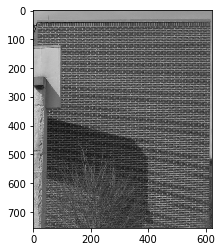

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


Low pass filtered with FT in 0.39968299865722656


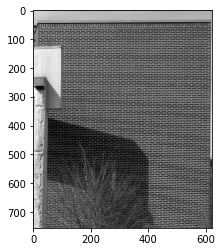

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


High pass filtered with FT in 0.4144172668457031


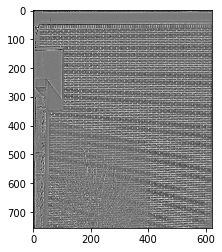

Band pass filtered with FT in 0.3852400779724121


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


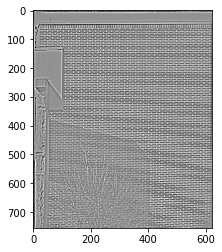

In [27]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

start = time()
WALL = fft2(wall_gray)
LPF = fft2(lp_filter, wall_gray.shape)
wall_lp = ifft2(WALL * LPF).astype(float)
end = time()
print("Low pass filtered with FT in {}".format(end - start))
imshow(wall_lp, cmap='gray')
show()

start = time()
WALL = fft2(wall_gray)
HPF = fft2(hp_filter, wall_gray.shape)
wall_hp = ifft2(WALL * HPF).astype(float)
end = time()
print("High pass filtered with FT in {}".format(end - start))
imshow(wall_hp, cmap='gray')
show()

start = time()
WALL = fft2(wall_gray)
BPF = fft2(bp_filter, wall_gray.shape)
wall_bp = ifft2(WALL * BPF).astype(float)
end = time()
print("Band pass filtered with FT in {}".format(end - start))
imshow(wall_bp, cmap='gray')
show()

Original image:


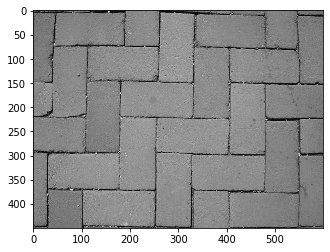

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


Low pass filtered with FT in 0.04896712303161621


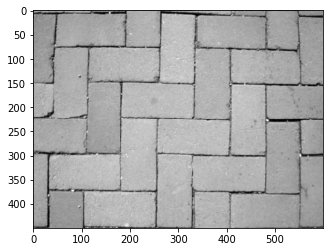

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:17: ComplexWarning: Casting complex values to real discards the imaginary part


High pass filtered with FT in 0.04578113555908203


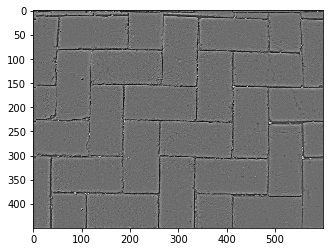

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


Band pass filtered with FT in 0.04570484161376953


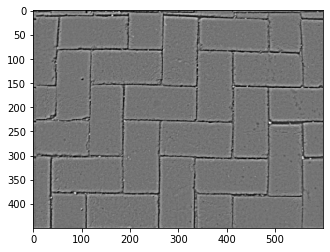

In [28]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

start = time()
WALL = fft2(side_gray)
LPF = fft2(lp_filter, side_gray.shape)
wall_lp = ifft2(WALL * LPF).astype(float)
end = time()
print("Low pass filtered with FT in {}".format(end - start))
imshow(wall_lp, cmap='gray')
show()

start = time()
WALL = fft2(side_gray)
HPF = fft2(hp_filter, side_gray.shape)
wall_hp = ifft2(WALL * HPF).astype(float)
end = time()
print("High pass filtered with FT in {}".format(end - start))
imshow(wall_hp, cmap='gray')
show()

start = time()
WALL = fft2(side_gray)
BPF = fft2(bp_filter, side_gray.shape)
wall_bp = ifft2(WALL * BPF).astype(float)
end = time()
print("Band pass filtered with FT in {}".format(end - start))
imshow(wall_bp, cmap='gray')
show()

## Part B: Sampling

Downsample both images to one fourth of the resolution by taking every second row and column. You can use numpy array slicing for this: *my_array[start:end:step]*. Compare the results in terms of distortions and unexpected effects. Explain why the quality of the two downsampled images differ. 

Original


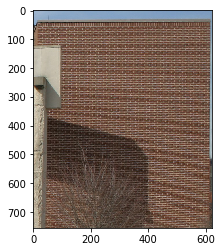

Downsampled


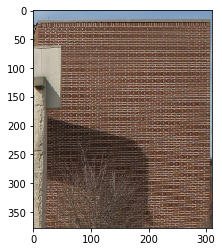

Original


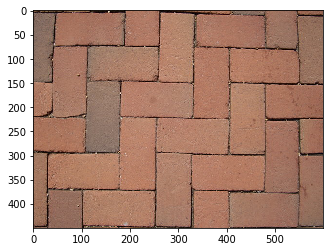

Downsampled


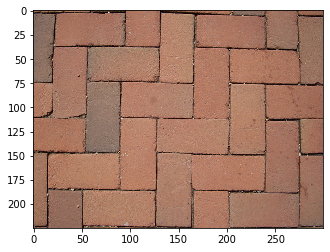

In [45]:
def downsample(img, factor):
    return img[::factor,::factor]

print("Original")
imshow(wall)
show()

# Downsampled wall
print("Downsampled")
imshow(downsample(wall, 2))
show()

print("Original")
imshow(side)
show()

# Downsampled sidewalk
print("Downsampled")
imshow(downsample(side, 2))
show()


The downsampled wall image suffers from undesired artifacts because of the large number of high frequency components. This edge distortion phenomenon is called aliasing. 

Create three 15x15 Gaussian low pass filters with standard deviations 0.5, 1 and 1.5 and apply them to the color image wall.jpg. You can filter the three channels separately and gather them in an RGB image with the numpy function *np.stack([r_img, g_img, b_img], axis=-1)*. Downsample the three filtered images to one fourth resolution. Compare the resulting downsampled images in terms of quality.

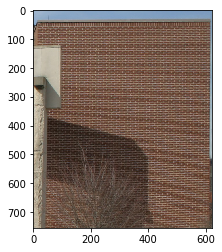

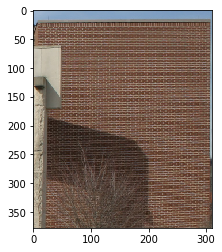

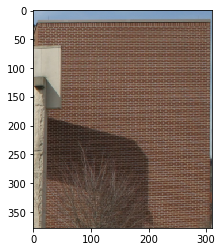

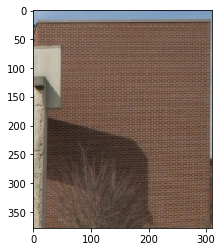

In [61]:
# Create the filters
# Enter your code here
gaussian_f_1 = gaussian_filter((15, 15), 0.5)
gaussian_f_2 = gaussian_filter((15, 15), 1)
gaussian_f_3 = gaussian_filter((15, 15), 1.5)

# Convolve them with the RGB image
# Enter your code here
wall_1 = np.stack([convolve(wall[:,:,0], gaussian_f_1), convolve(wall[:,:,1], gaussian_f_1), convolve(wall[:,:,2], gaussian_f_1)], axis=-1)
wall_2 = np.stack([convolve(wall[:,:,0], gaussian_f_2), convolve(wall[:,:,1], gaussian_f_2), convolve(wall[:,:,2], gaussian_f_2)], axis=-1)
wall_3 = np.stack([convolve(wall[:,:,0], gaussian_f_3), convolve(wall[:,:,1], gaussian_f_3), convolve(wall[:,:,2], gaussian_f_3)], axis=-1)

imshow(wall_1)
show()
# Downsample the resulting images
# Enter your code here
imshow(downsample(wall_1, 2))
show()

imshow(downsample(wall_2, 2))
show()

imshow(downsample(wall_3, 2))
show()

The greater the sigma / the more we low pass filter the image the less artifact effects we get!

## Bonus: for those that finished earlier

Load the blurred road signs image and using your fresh knowledge about filters, design the perfect filter to make the text readable.

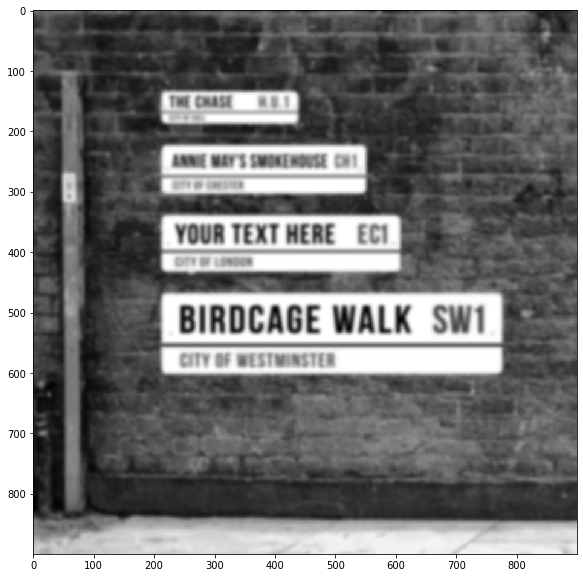

In [62]:
blurred_road_signs = np.array(imread('blurred_road_signs.jpg', as_gray=True), dtype=np.float) / 255.

figure(figsize=(10, 10))
imshow(blurred_road_signs, cmap='gray')
show()

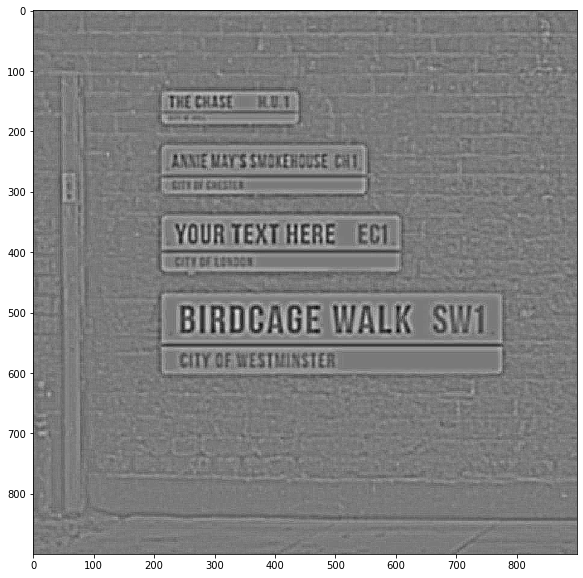

In [78]:
figure(figsize=(10, 10))
sharp_filter = gau
sharp_filter[2, 2] = 24
imshow(convolve(blurred_road_signs, sharp_filter), cmap='gray')
show()